In [1]:
import networkx as nx 
import pylab as plt
import numpy as np

In [2]:
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [3]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(2,3)

In [4]:
def setNodes(G,pos):
    for i,v in enumerate(G.nodes()):
        G.nodes()[v]['X'] = pos[i][0]
        G.nodes()[v]['Y'] = pos[i][1]

def setEdges(G,pos):
    G[0][1]['X'] = pos[0][0]
    G[0][1]['Y'] = pos[0][1]

    G[2][3]['X'] = pos[1][0]
    G[2][3]['Y'] = pos[1][1]

def printGraph(G):
    plt.plot(G[0][1]['X'], G[0][1]['Y'],'o-')
    plt.plot(G[2][3]['X'], G[2][3]['Y'],'o-')

In [5]:
setNodes(G, [(-2,4), (2,4), (-2,0), (2,0)])

xline = np.linspace(-2,2,50)
epos = [(xline, np.square(xline)), (xline, -np.square(xline) + 4)]
setEdges(G,epos)

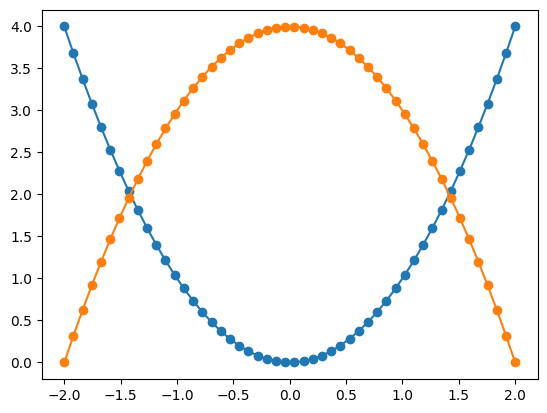

In [6]:
printGraph(G)
plt.show()

In [7]:
from modules.abstractBundling import RealizedBundling
B = RealizedBundling(G,'test')

In [8]:
from modules.metrics import Metrics
M = Metrics(B)
matplotlib.use("module://matplotlib_inline.backend_inline")

In [9]:
print("all intersections", M.calcAllIntersections())
print("self intersections", M.calcSelfIntersections())
print("fastFrechet", M.calcFrechet())
print("projected monotonicity", M.calcProjectedMonotonicity(normalize=False,return_mean=False))
print("monotonicity", M.calcMonotonicity(return_mean=False,normalize=False))

computing crossings, will take a while
all intersections 2
self intersections 0.0
fastFrechet 3.9983340274885464
projected monotonicity [0. 0.]
monotonicity [[-2.          4.        ]
 [-1.91836735  4.        ]
 [-1.83673469  4.        ]
 [-1.75510204  4.        ]
 [-1.67346939  4.        ]
 [-1.59183673  4.        ]
 [-1.51020408  4.        ]
 [-1.42857143  4.        ]
 [-1.34693878  4.        ]
 [-1.26530612  4.        ]
 [-1.18367347  4.        ]
 [-1.10204082  4.        ]
 [-1.02040816  4.        ]
 [-0.93877551  4.        ]
 [-0.85714286  4.        ]
 [-0.7755102   4.        ]
 [-0.69387755  4.        ]
 [-0.6122449   4.        ]
 [-0.53061224  4.        ]
 [-0.44897959  4.        ]
 [-0.36734694  4.        ]
 [-0.28571429  4.        ]
 [-0.20408163  4.        ]
 [-0.12244898  4.        ]
 [-0.04081633  4.        ]
 [ 0.04081633  4.        ]
 [ 0.12244898  4.        ]
 [ 0.20408163  4.        ]
 [ 0.28571429  4.        ]
 [ 0.36734694  4.        ]
 [ 0.44897959  4.        ]
 [ 0.5

In [10]:
setNodes(G,[(1,2), (5,2), (3,3), (4,1)])

x1 = np.linspace(1,5,50)
x2 = np.linspace(3,4,50)
m = (1-3) / (4-3)
b = 3 - (3*m)
setEdges(G,[(x1, np.repeat(2,50)), (x2, m * x2 + b)])

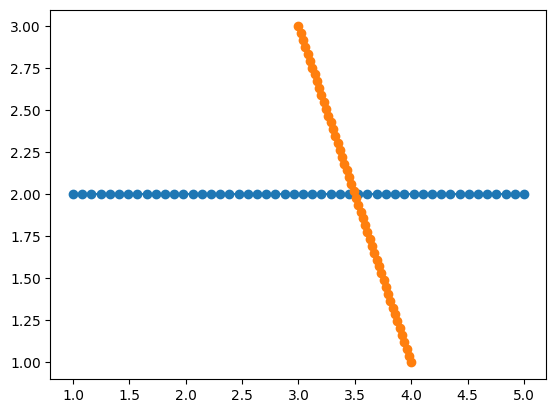

In [11]:
printGraph(G)

In [12]:
M.calcAllIntersections()

computing crossings, will take a while


1

In [13]:
setNodes(G,[(1,2), (5,2), (4,2), (7,2)])

x1 = np.linspace(1,5,50)
x2 = np.linspace(4,7,50)
setEdges(G,[(x1, np.repeat(2,50)), (x2, np.repeat(2,50))])

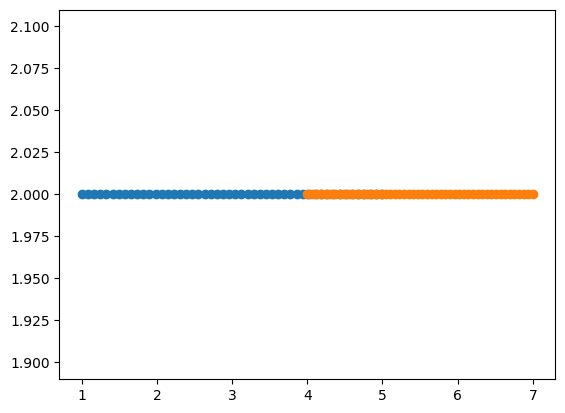

In [14]:
printGraph(G)

In [15]:
M.calcAllIntersections()

computing crossings, will take a while


27

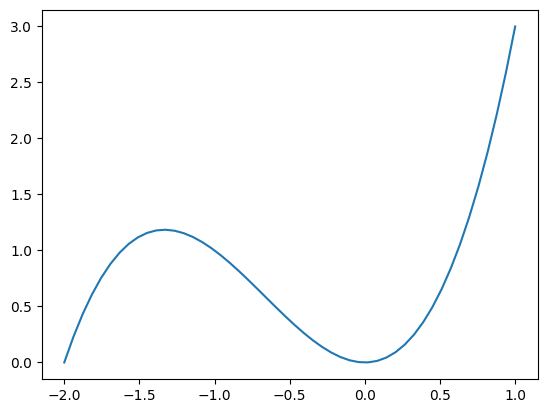

In [16]:
x = np.linspace(-2,1,50)
y = x ** 3 + 2 * x **2

plt.plot(x,y)

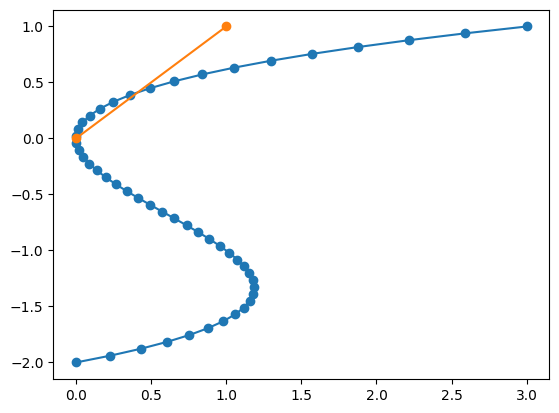

In [ ]:
setNodes(G,[(y[0],y[0]), (y[-1], x[-1]), (0,0), (1,1)])

setEdges(G,[(y,x), ((0,1), (0,1))])
printGraph(G)

In [18]:
proj = M.calcMonotonicity(normalize=False, return_mean=False)

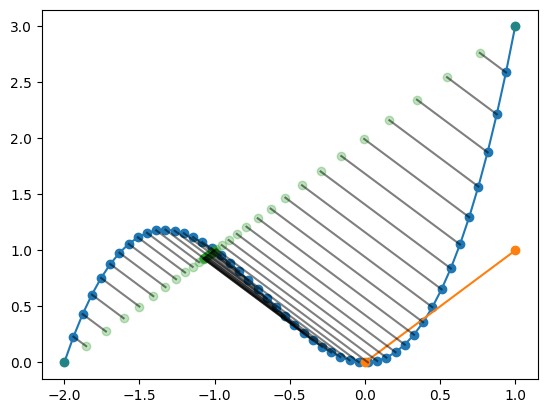

In [19]:
printGraph(G)
plt.plot(proj[:,0],proj[:,1],'o',alpha=0.3)

for index in range(50):
    plt.plot([proj[index,0],G[0][1]['X'][index]], 
             [proj[index,1], G[0][1]['Y'][index]],
             color='black',
             alpha=0.5)